In [1]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


with open('../resources/sample_vectors.txt', 'r') as f:
    vectors = f.read()
vectors = np.array([vector.split(' ')[:-1] for vector in vectors.split('\n')[:-1]], dtype=np.float32)

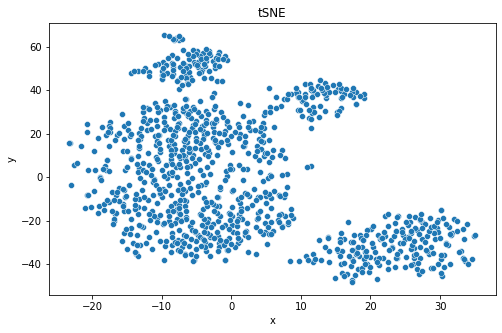

In [7]:
def show_tsne(X):
    tsne = TSNE(n_components=2, random_state=1, n_iter=50000)
    tsne_results = tsne.fit_transform(X)
    data = {}
    data['x'] = tsne_results[:, 0]
    data['y'] = tsne_results[:, 1]
    plt.figure(figsize=(8,5))
    sp = sns.scatterplot(
        x='x', y='y',
        data=data,
        legend='full',
        alpha=1
    )
    sp.set_title('tSNE')
show_tsne(vectors)

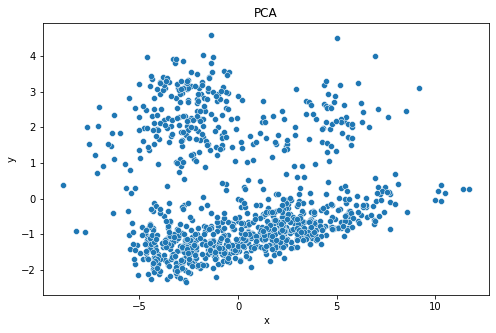

In [8]:
def show_pca(X):
    pca = PCA(n_components=2)
    pca_results = pca.fit_transform(X)

    data = {}
    data['x'] = pca_results[:, 0]
    data['y'] = pca_results[:, 1]
    plt.figure(figsize=(8,5))
    sp = sns.scatterplot(
        x='x', y='y',
        data=data,
        legend='full',
        alpha=1
    )
    sp.set_title('PCA')
show_pca(vectors)

#### Finding closest abstracts

In [2]:
from annoy import AnnoyIndex
import random
f = vectors.shape[1]
t = AnnoyIndex(f, 'angular')
for i, vec in enumerate(vectors):
    t.add_item(i, vec)


t.build(100)
dist = []
for i in range(vectors.shape[0]):
    dist.append(t.get_nns_by_item(i, 2, include_distances=True))

dist = [([i, item[0][1]], item[1][1]) for i, item in enumerate(dist)]
# t.get_item_vector(0)

top10 = sorted(dist, key=lambda x:x[1])[:10]
print(top10)

[([582, 962], 0.09864520281553268), ([962, 582], 0.09864520281553268), ([278, 377], 0.1602739840745926), ([377, 278], 0.1602739840745926), ([532, 896], 0.16902419924736023), ([896, 532], 0.16902419924736023), ([219, 640], 0.17008352279663086), ([640, 219], 0.17008352279663086), ([64, 174], 0.17265212535858154), ([174, 64], 0.17265212535858154)]
